<a href="https://colab.research.google.com/github/Blacksmith1111/Optics/blob/main/HomeTask1v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp

class MyModulator:
  def __init__(self, bits_number, mod_type = "QPSK"):
    self.mod_type = mod_type
    self.bits_stream=[]
    self.bits_stream = np.random.binomial(n = 1, p = 0.5, size = bits_number)
    #for i in range(16):
      #bin_i = bin(i)[2:].rjust(4, '0')
      #print(f"got bits in str {bin_i}")
      #bits = [int(digit) for digit in bin_i]
      #print(f"got bits {bits}")
      #self.bits_stream.extend(bits)

    #self.bits_stream = [1,1,1,0,1,0,1,0,0,0,0,0]

  def bits_to_symbols(self):
    self.symbols = []
    if self.mod_type == "16QAM":
      self.symbols = np.array([self.bits_stream[i : i + 4] if i + 4 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 4)])
      self.symbols = self.symbols if len(self.bits_stream) % 4 == 0 else self.symbols[0:-1]
    elif self.mod_type == "QPSK":
      self.symbols = np.array([self.bits_stream[i : i + 2] if i + 2 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 2)])
      self.symbols = self.symbols if len(self.bits_stream) % 2 == 0 else self.symbols[0:-1]
    elif self.mod_type == "64QAM":
      self.symbols = np.array([self.bits_stream[i : i + 6] if i + 6 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 6)])
      self.symbols = self.symbols if len(self.bits_stream) % 6 == 0 else self.symbols[0:-1]
    return self.symbols

  def mapper(self):
    self.I = np.zeros(len(self.symbols))
    self.Q = np.zeros(len(self.symbols))
    self.bin_vals = np.zeros(self.symbols.shape)
    if self.mod_type == "16QAM":
      Levels = np.array([1, 3])
      for index, symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = (Levels[0] if (str(symbol[1]) + str(symbol[3]) == "11" or  str(symbol[1]) + str(symbol[3]) == "10") else Levels[1]) * (-1 if str(symbol[0]) + str(symbol[2]) == "01" or str(symbol[0]) + str(symbol[2]) == "00" else 1)
        self.Q[index] = (Levels[0] if str(symbol[1]) + str(symbol[3]) == "11" or str(symbol[1]) + str(symbol[3]) == "01" else Levels[1]) * (-1 if str(symbol[0]) + str(symbol[2]) == "00" or str(symbol[0]) + str(symbol[2]) == "10" else 1)

    elif self.mod_type == "QPSK":
      Levels = np.array([-1, 1])
      for index, symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = Levels[0] if symbol[0] == 0 else Levels[1]
        self.Q[index] = Levels[0] if symbol[1] == 0 else Levels[1]

    elif self.mod_type == "64QAM":
      dict_64 = {"000000": -7 - 7j, "000001": -7 - 5j, "000010":-7 - 1j, "000011":-7 - 3j,
                          "000100":-7 + 7j, "000101":-7 + 5j, "000110":-7 + 1j, "000111":-7 + 3j,
                          "001000":-5 - 7j, "001001":-5 - 5j, "001010":-5 - 1j, "001011":-5 - 3j,
                          "001100":-5 + 7j, "001101":-5 + 5j, "001110":-5 + 1j, "001111":-5 + 3j,
                          "010000":-1 - 7j, "010001":-1 - 5j, "010010":-1 - 1j, "010011":-1 - 3j,
                          "010100":-1 + 7j, "010101":-1 + 5j, "010110":-1 + 1j, "010111":-1 + 3j,
                          "011000":-3 - 7j, "011001":-3 - 5j, "011010":-3 - 1j, "011011":-3 - 3j,
                          "011100":-3 + 7j, "011101":-3 + 5j, "011110":-3 + 1j, "011111":-3 + 3j,
                          "100000":7 - 7j, "100001":7 - 5j, "100010":7 - 1j, "100011":7 - 3j,
                          "100100":7 + 7j, "100101":7 + 5j, "100110":7 + 1j, "100111":7 + 3j,
                          "101000":5 - 7j, "101001":5 - 5j, "101010":5 - 1j, "101011":5 - 3j,
                          "101100":5 + 7j, "101101":5 + 5j, "101110":5 + 1j, "101111":5 + 3j,
                          "110000":1 - 7j, "110001":1 - 5j, "110010":1 - 1j, "110011":1 - 3j,
                          "110100":1 + 7j, "110101":1 + 5j, "110110":1 + 1j, "110111":1 + 3j,
                          "111000":3 - 7j, "111001":3 - 5j, "111010":3 - 1j, "111011":3 - 3j,
                          "111100":3 + 7j, "111101":3 + 5j, "111110":3 + 1j, "111111":3 + 3j}
      for index,symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = np.real(dict_64[str(symbol).replace(" ", "")[1:-1]])
        self.Q[index] = np.imag(dict_64[str(symbol).replace(" ", "")[1:-1]])

    self.mapped = self.I + 1j*self.Q
    return self.mapped


In [75]:
class MyDemodulator:
  def __init__(self, mapped_symbols, mod_type = "QPSK"):
    self.mod_type = mod_type
    self.mapped = mapped_symbols

  def demodulate(self):
    out_symbol = []
    self.out_bits = []
    ref_arr = []

    if self.mod_type == "16QAM":
      dict_16 = {-3 + 3j: "0010", -3 + 1j: "0011", -3 - 3j: "0000", -3 - 1j: "0001",
                 -1 + 3j: "0110", -1 + 1j: "0111", -1 - 3j: "0100", -1 - 1j: "0101",
                  3 + 3j: "1010",  3 + 1j: "1011",  3 - 3j: "1000",  3 - 1j: "1001",
                  1 + 3j: "1110",  1 + 1j: "1111",  1 - 3j: "1100",  1 - 1j: "1101"}
      levels = np.array([-3, -1, 1, 3])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_16[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    elif self.mod_type == "QPSK":
      dict_qpsk = {1 + 1j: "11", -1 +1j: "01", -1 -1j: "00", 1 - 1j: "10"}
      levels = np.array([-1, 1])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_qpsk[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    elif self.mod_type == "64QAM":
      prevdict_64 = {"000000": -7 - 7j, "000001": -7 - 5j, "000010":-7 - 1j, "000011":-7 - 3j,
                          "000100":-7 + 7j, "000101":-7 + 5j, "000110":-7 + 1j, "000111":-7 + 3j,
                          "001000":-5 - 7j, "001001":-5 - 5j, "001010":-5 - 1j, "001011":-5 - 3j,
                          "001100":-5 + 7j, "001101":-5 + 5j, "001110":-5 + 1j, "001111":-5 + 3j,
                          "010000":-1 - 7j, "010001":-1 - 5j, "010010":-1 - 1j, "010011":-1 - 3j,
                          "010100":-1 + 7j, "010101":-1 + 5j, "010110":-1 + 1j, "010111":-1 + 3j,
                          "011000":-3 - 7j, "011001":-3 - 5j, "011010":-3 - 1j, "011011":-3 - 3j,
                          "011100":-3 + 7j, "011101":-3 + 5j, "011110":-3 + 1j, "011111":-3 + 3j,
                          "100000":7 - 7j, "100001":7 - 5j, "100010":7 - 1j, "100011":7 - 3j,
                          "100100":7 + 7j, "100101":7 + 5j, "100110":7 + 1j, "100111":7 + 3j,
                          "101000":5 - 7j, "101001":5 - 5j, "101010":5 - 1j, "101011":5 - 3j,
                          "101100":5 + 7j, "101101":5 + 5j, "101110":5 + 1j, "101111":5 + 3j,
                          "110000":1 - 7j, "110001":1 - 5j, "110010":1 - 1j, "110011":1 - 3j,
                          "110100":1 + 7j, "110101":1 + 5j, "110110":1 + 1j, "110111":1 + 3j,
                          "111000":3 - 7j, "111001":3 - 5j, "111010":3 - 1j, "111011":3 - 3j,
                          "111100":3 + 7j, "111101":3 + 5j, "111110":3 + 1j, "111111":3 + 3j}
      dict_64 = {val:key for key, val in prevdict_64.items()}
      levels = np.array([-7, -5, -3, -1, 1, 3, 5, 7])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_64[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    return self.out_bits

In [104]:
def ber_count(start_bits, proc_bits):
    return np.sum(np.logical_xor(start_bits, proc_bits)) / len(start_bits)
  #ber = np.sum(proc_bits != start_bits) / len(start_bits)
  #return ber

def Noise_generator(mapped, snr):
  mapped_number = len(mapped)
  root_points_power = np.linalg.norm(mapped) / np.sqrt(mapped_number)
  print(root_points_power ** 2)
  print((10 ** (snr / 10)))
  noise_power = (root_points_power ** 2) / (2 * (10 ** (snr / 10)))
  print(noise_power ** 2)
  Re = np.random.normal(0, scale = np.sqrt(noise_power), size = mapped_number)
  Im = np.random.normal(0, scale = np.sqrt(noise_power), size = mapped_number)
  print(np.linalg.norm(Re + 1j * Im)/np.sqrt(mapped_number))
  return Re + 1j * Im

def plot_constellation(mapped, bin_vals, mod_type = "QPSK"):
  plt.figure(figsize = (8, 8))
  plt.scatter(np.real(mapped), np.imag(mapped), color= 'red')

  for (x, y, txt) in zip(np.real(mapped), np.imag(mapped), bin_vals):
    plt.text(x, y, str(txt), fontsize = 13)

  if mod_type == "16QAM":
    plt.title('16QAM Constellation')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
  elif mod_type == "QPSK":
     plt.title('QPSK Constellation')
     plt.xlim(-2, 2)
     plt.ylim(-2, 2)
  elif mod_type =="64QAM":
    plt.title('64QAM Constellation')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)

  plt.xlabel('I')
  plt.ylabel('Q')
  plt.grid(True)
  plt.axhline(0, color = 'black', lw = 0.5)
  plt.axvline(0, color = 'black', lw = 0.5)
  plt.show()

In [106]:
def BER_of_SNR(ber = 1, snr = 10, Npts = 4, mod_type = "QPSK", calc_type = "theoretical"):
  if calc_type == "theoretical":
    gamma = np.power(10, (snr / 10)) / np.log2(Npts) # from db to ratio
    if mod_type == "QPSK":
      ber = 0.5 * sp.erfc(np.sqrt(2 * gamma / 2))
    elif mod_type == "16QAM" or mod_type == "64QAM":
      ber = (4 / np.log2(Npts)) * (1 - 1 / np.sqrt(Npts)) * 0.5 * sp.erfc(np.sqrt(3 * np.log2(Npts) * gamma /(2 * (Npts - 1))))

  plt.figure(figsize = (8, 8))
  gamma = np.power(10, (snr / 10)) / np.log2(Npts) #added
  myber = (4 / np.log2(Npts)) * (1 - 1 / np.sqrt(Npts)) * 0.5 * sp.erfc(np.sqrt(3 * np.log2(Npts) * gamma /(2 * (Npts - 1))))
  plt.plot(snr, ber, color= 'black')
  plt.plot(snr, myber, color= 'red')
  plt.yscale('log')
  plt.xlabel("SNR(db)")
  plt.ylabel("BER")
  plt.title("BER(SNR)")
  plt.grid(True)


  plt.show()



10.032
1.0
25.160256
3.1506472609271103
[1 0 0 ... 0 1 0] 0.2842 16QAM demodulate

10.032
1.2742749857031337
15.494898647563259
2.785986672412763
[1 0 1 ... 0 1 1] 0.2538 16QAM demodulate

10.032
1.6237767391887217
9.542505612751224
2.490847123705021
[1 0 1 ... 1 0 1] 0.2395 16QAM demodulate

10.032
2.0691380811147897
5.876735010700356
2.2446189025599512
[1 0 0 ... 1 1 1] 0.2158 16QAM demodulate

10.032
2.636650898730358
3.6191767432489006
1.9724742125183108
[1 0 0 ... 0 1 1] 0.1906 16QAM demodulate

10.032
3.3598182862837818
2.2288635228616034
1.7343556290249293
[1 0 0 ... 1 0 1] 0.162 16QAM demodulate

10.032
4.281332398719393
1.3726416132646397
1.5172414285063345
[1 0 0 ... 0 0 1] 0.1284 16QAM demodulate

10.032
5.455594781168519
0.8453388819638126
1.354200217003289
[1 0 0 ... 1 1 1] 0.1111 16QAM demodulate

10.032
6.951927961775605
0.5206004382019689
1.1957550188405197
[1 0 0 ... 1 1 1] 0.0869 16QAM demodulate

10.032
8.858667904100825
0.320610848546872
1.0603614066697877
[1 0 0 ..

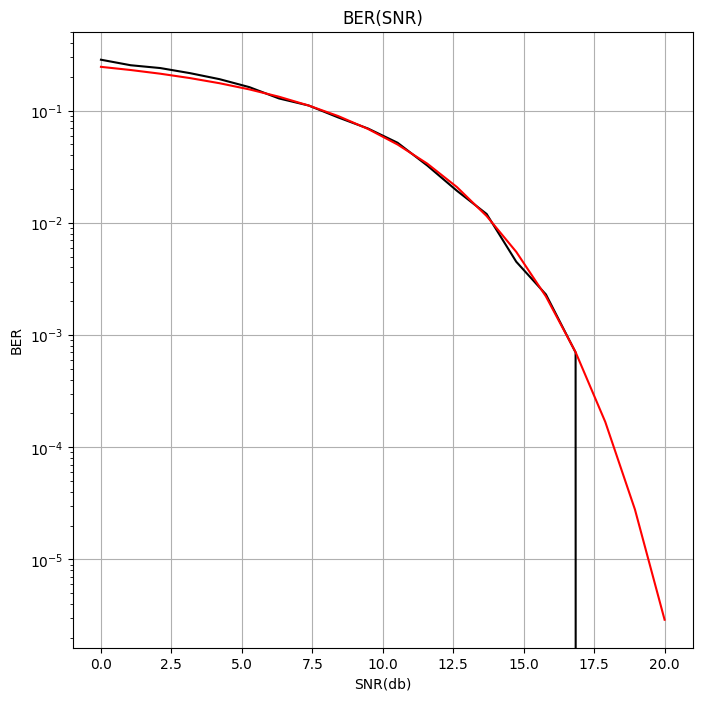

In [107]:
num_bits = 10000
snr = np.linspace(0, 20, 20)
#snr = 2
### test 16QAM with noise
obj_16 = MyModulator(num_bits, "16QAM")
ber = np.zeros(len(snr))
obj_16.bits_to_symbols()
obj_16.mapper()
#print(obj_16.bits_to_symbols(), obj_16.bits_to_symbols().shape, "\n")
#print(obj_16.mapper(), obj_16.mapper().shape, "obj_16 mapper\n")
#dem16 = MyDemodulator(obj_16.mapper(), "16QAM")
#print(dem16.demodulate().reshape(16, -1), "\n")
for ind, val in enumerate(snr):
  w_noise_16 = obj_16.mapper() + Noise_generator(obj_16.mapped, val)
  dem16 = MyDemodulator(w_noise_16, "16QAM")
  #dem16.demodulate()
  print(dem16.demodulate(), ber_count(obj_16.bits_stream, dem16.out_bits), "16QAM demodulate\n")
  ber[ind] = ber_count(obj_16.bits_stream, dem16.out_bits)
BER_of_SNR(snr = snr, mod_type = "16QAM", Npts = 16, ber = ber, calc_type = "practical")
#print(Noise_generator(obj_16.mapped, snr[2]).shape, "Noise_generator(obj_16.mapped, snr[2]).shape\n")
#print(w_noise_16.shape, "obj_16 mapper with noise\n")
### test QPSK
#qpsk = MyModulator(num_bits, snr = 3)
#print(qpsk.bits_to_symbols(), qpsk.bits_to_symbols().shape, "\n")
#print(qpsk.mapper(), "qpsk mapper\n")
#w_noise_qpsk = qpsk.mapper() + Noise_generator(qpsk.mapped, qpsk.snr)
#print(w_noise_qpsk, "qpsk mapper with noise\n")
### test 64QAM
#obj_64 = MyModulator(num_bits, "64QAM", 3)
#print(obj_64.bits_to_symbols(), obj_64.bits_to_symbols().shape, "\n")
#print(obj_64.mapper(), "obj_64 mapper\n")
#w_noise_64 = obj_64.mapper() + Noise_generator(obj_64.mapped, obj_64.snr)
#print(w_noise_64, "obj_64 mapper with noise\n")
### demodulator with noise


#dem_qpsk = MyDemodulator(w_noise_qpsk)
#print(dem_qpsk.demodulate(), ber_count(qpsk.bits_stream, dem_qpsk.out_bits))
#dem64 = MyDemodulator(w_noise_64, "64QAM")
#print(dem64.demodulate(), ber_count(obj_64.bits_stream, dem64.out_bits), "64QAM demodulate\n")
### BER(SNR)

#print("Theory\n")
#BER_of_SNR(snr = snr, mod_type = "64QAM", Npts = 64)
#print("Practice\n")
#BER_of_SNR(snr = snr, mod_type = "64QAM", Npts = 64, ber = ber_count(obj_64.bits_stream, dem64.out_bits), calc_type = "practical")